### Problem Statement

#### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
> 1)  Which variables are significant in predicting the demand for shared bikes.<br>
> 2)  How well those variables describe the bike demands

#### Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal: 
#### We  required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### Dataset characteristics 
**- instant: record index** <br>
**- dteday : date** <br>
**- season : season (1:spring, 2:summer, 3:fall, 4:winter)** <br>
**- yr : year (0: 2018, 1:2019)** <br>
**- mnth : month ( 1 to 12)** <br>
**- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)** <br>
**- weekday : day of the week** <br>
**- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.** <br>
**-weathersit** <br>
		<- 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
		<- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
		<- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
		<- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  <br>
**- temp : temperature in Celsius** <br>
**- atemp: feeling temperature in Celsius** <br>
**- hum: humidity** <br>
**- windspeed: wind speed** <br>
**- casual: count of casual users** <br>
**- registered: count of registered users** <br>
**- cnt: count of total rental bikes including both casual and registered** <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.feature_selection import RFE
import scipy.stats as stats

In [2]:
from dmba import stepwise_selection
from dmba import AIC_score

### Step - 1. Reading, understandig and visualising data

In [3]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'Data'

In [4]:
BoomBikes=DATA / 'day.csv'

In [5]:
ds = pd.read_csv(BoomBikes)

#### 1.1 Reading and Understanding data

In [8]:
ds

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [9]:
ds.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### 1.2 Missing values

In [10]:
missing_values = ds.isnull().sum()/len(ds)
missing_values

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
ds.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
ds.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
numeric=['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

In [14]:
Categorical=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

 #### 1.3 Univariate Analysis numerical Data

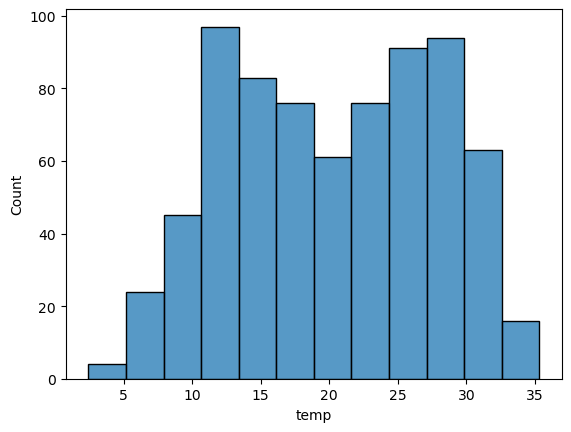

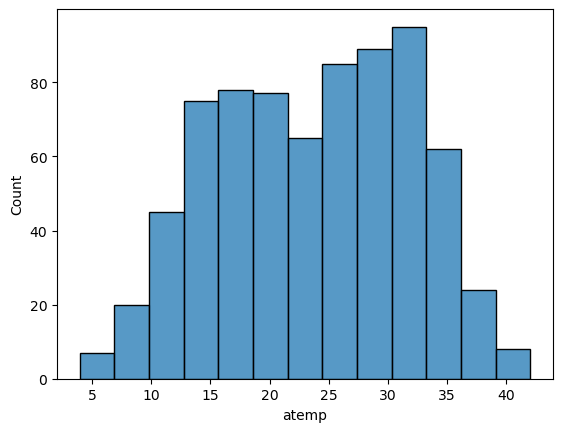

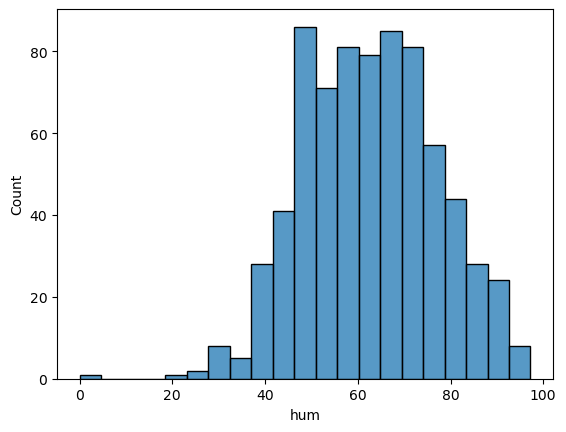

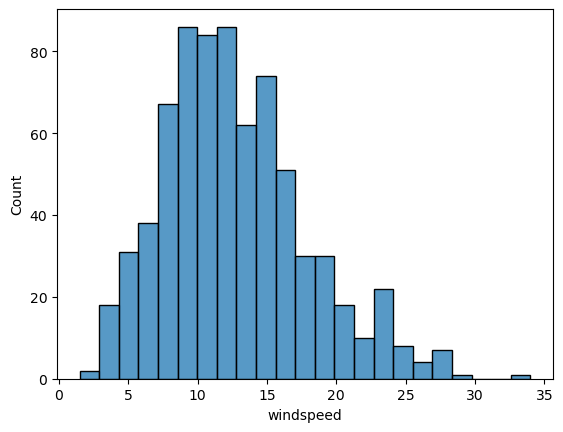

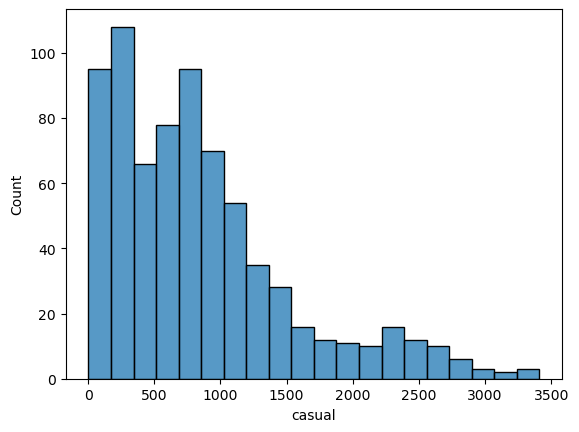

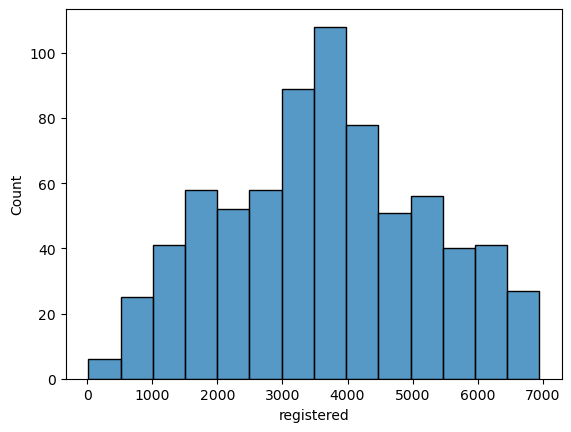

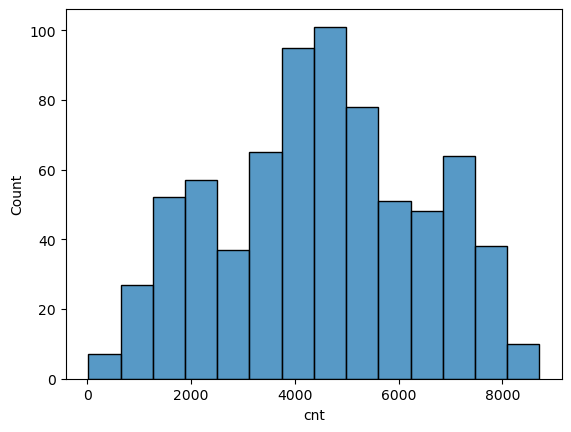

In [15]:
for col in numeric[:]:
    sns.histplot(x=ds[col])
    plt.show()

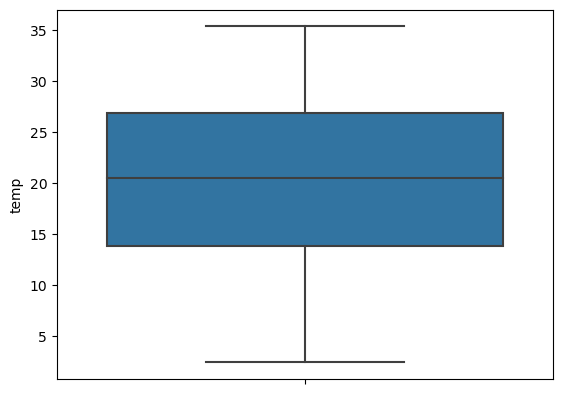

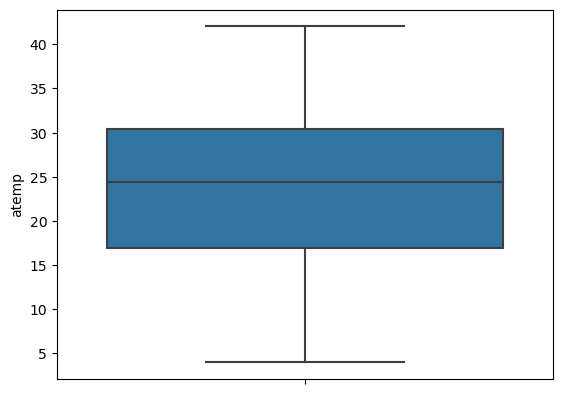

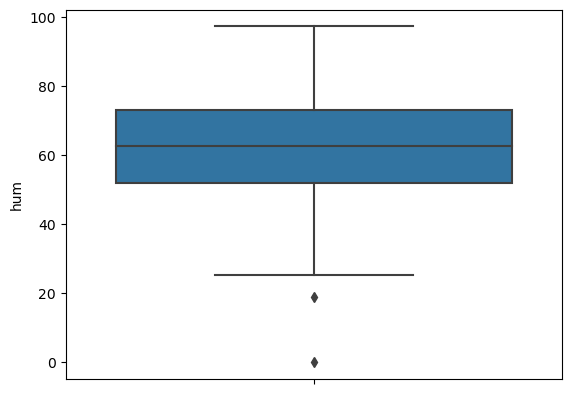

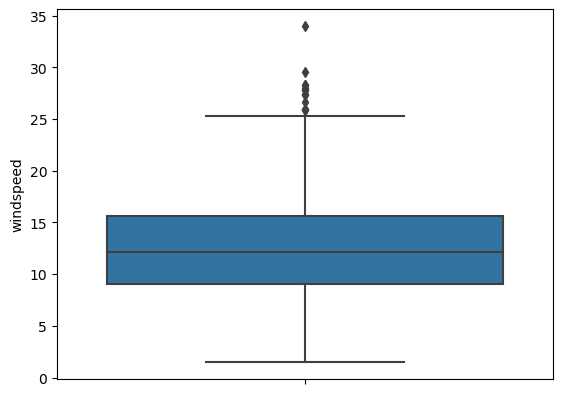

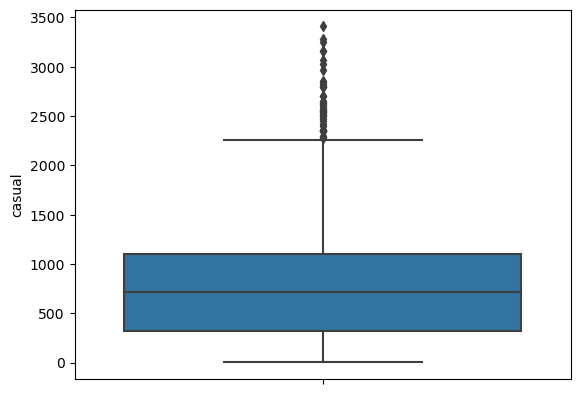

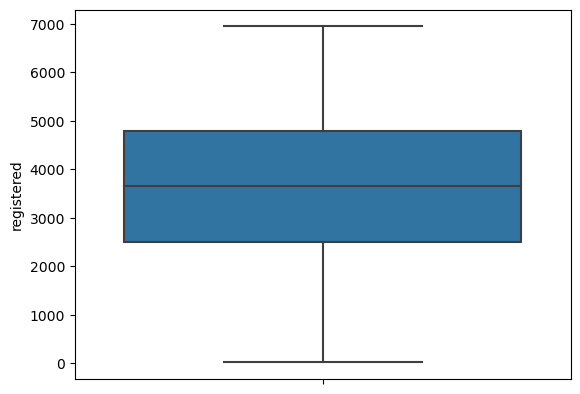

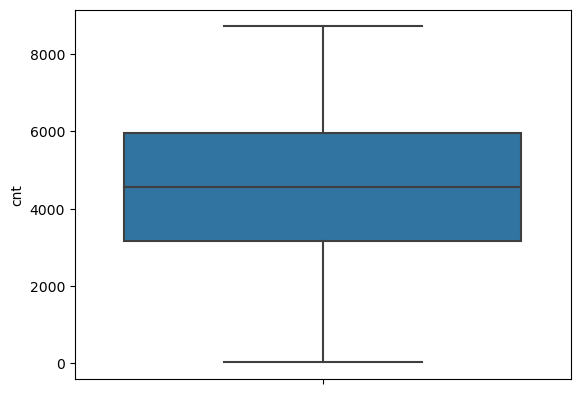

In [16]:
#### checking outliers
for col in numeric[:]:
    sns.boxplot(y=ds[col])
    plt.show()

#### 1.4 Univariate Analysis Categorical

In [17]:
ds[Categorical[1:]].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

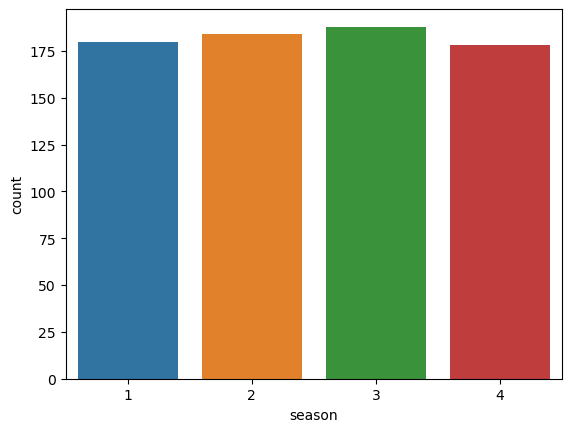

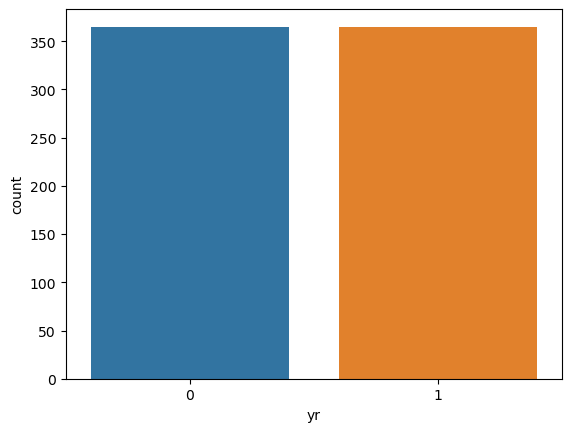

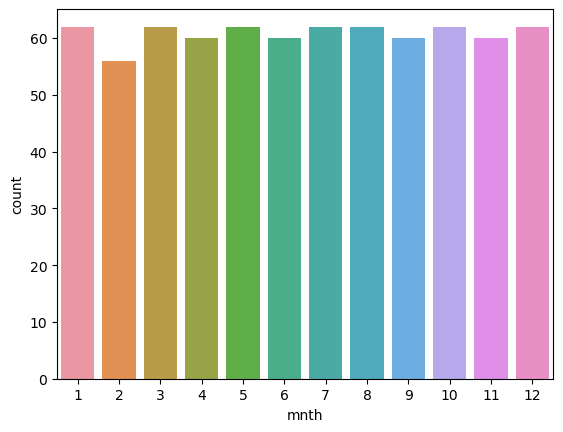

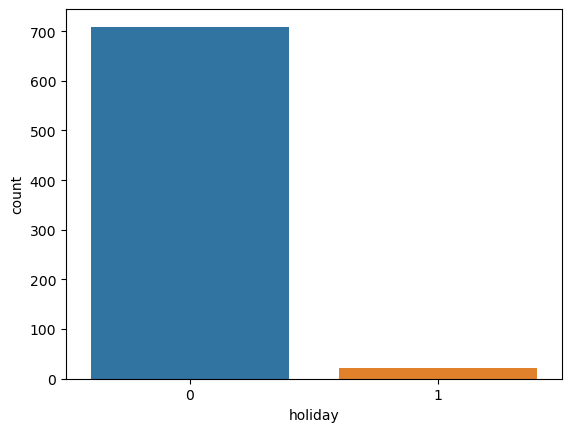

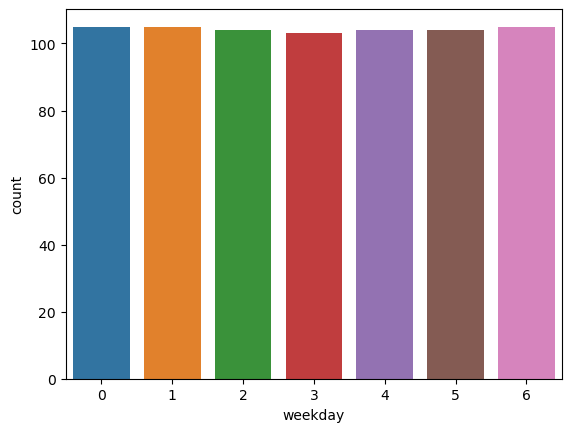

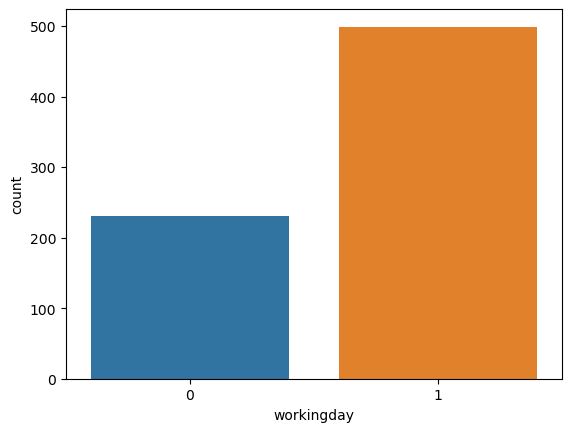

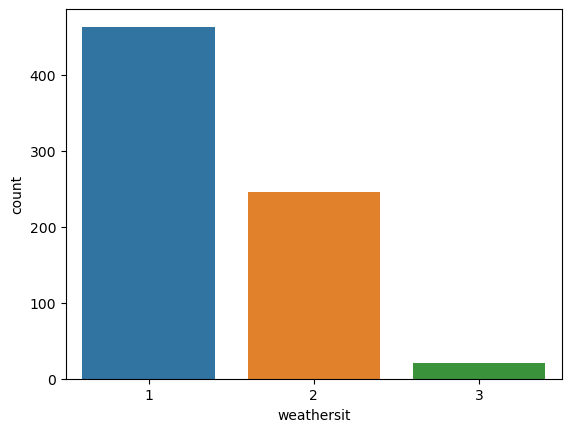

In [18]:
for col in Categorical[1:]:
    sns.countplot(x=ds[col])
    plt.show()

#### 1.5 Bivariate Analysis

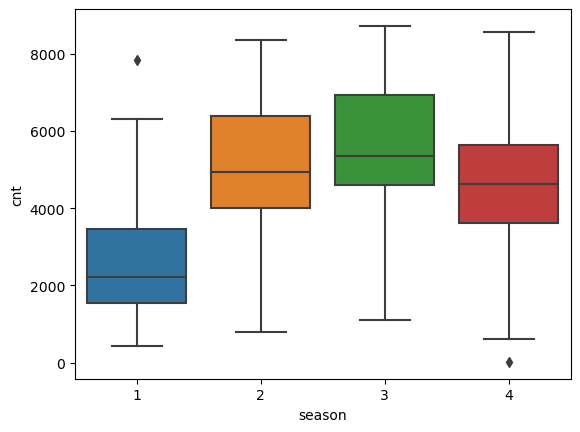

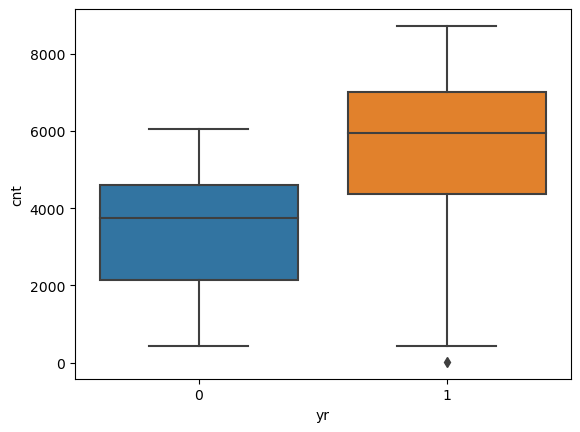

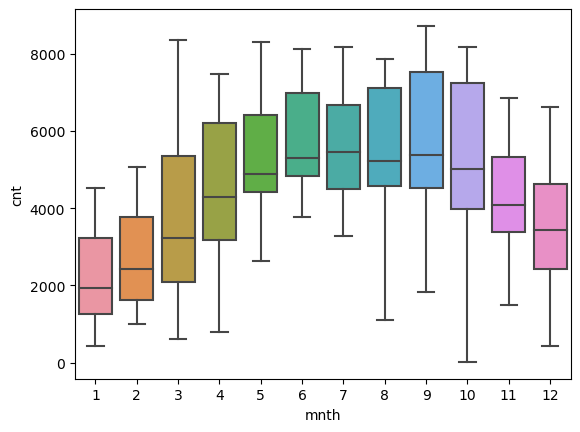

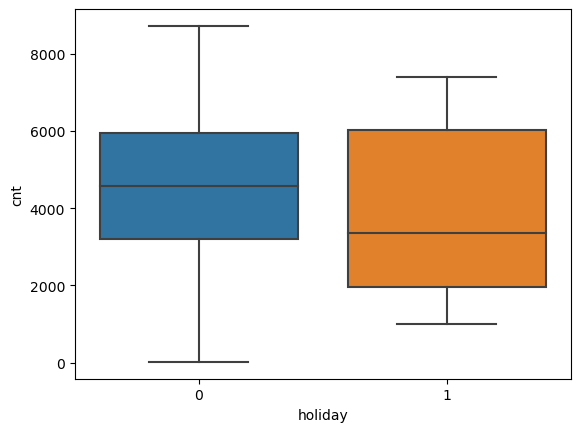

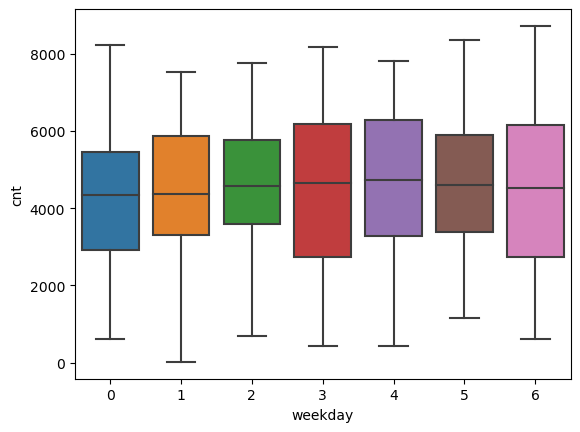

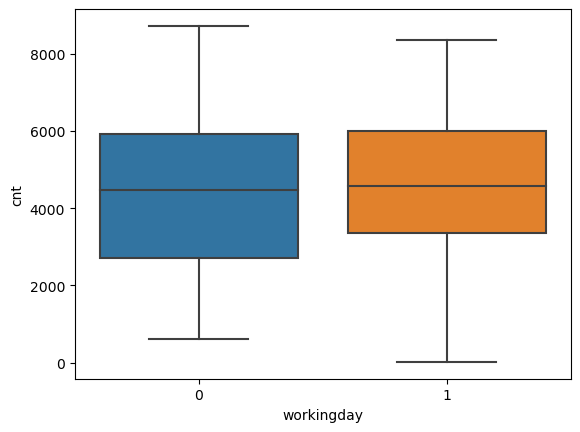

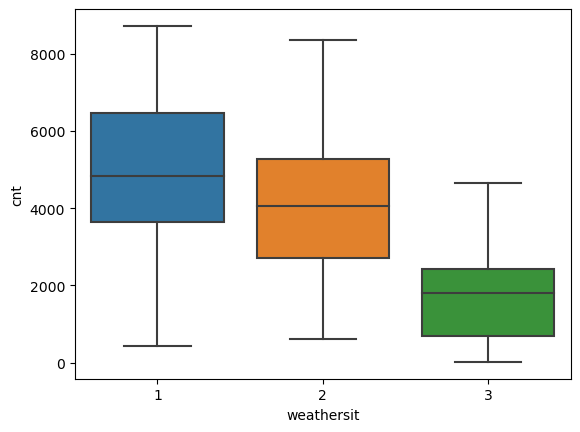

In [19]:
for col1 in ['cnt']:
    for col2 in Categorical[1:]:
        sns.boxplot(x=ds[col2],y=ds[col1])
        plt.show()

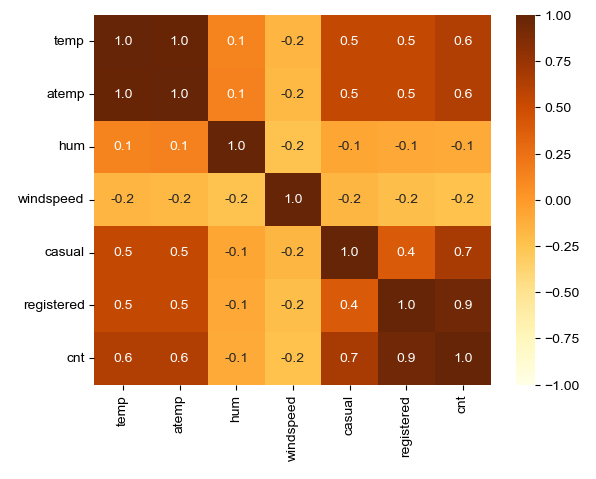

In [20]:
width = 30
height = 15
sns.heatmap(ds[numeric].corr(),vmin=-1,vmax=1,annot=True,fmt='.1f',cmap="YlOrBr")
sns.set(rc = {'figure.figsize':(width, height)})
plt.show()

In [21]:
# dropping the colummns related to instant,
ds_updated=ds.copy()

#### 1.6 Droping Columns <br>
instant column is a record index which does not have any significance in out analysis. So we will drop the column <br>
The varibles casual and registered are summed up to get cnt which is our target variable. Also during prediction we wll not be having these data, so we will drop these two variables which we are not going to use in the model. <br>
We are going to use weekday varible which is derived from dteday, so we will not be using dteday and will drop it.<br>
temp and atemp are directly correlated among each other. We will use temp and drop atemp.<br>

In [22]:
ds_updated=ds_updated.drop(['instant', 'dteday','casual','registered','atemp'], axis=1)

In [23]:
ds_updated.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


In [24]:
numeric=['temp', 'hum', 'windspeed','cnt']
Categorical=['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

In [25]:
ds_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [26]:
ds_updated[Categorical] = ds_updated[Categorical].astype('category')

In [27]:
ds_updated.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [28]:
ds_updated.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


In [29]:
ds_updated['season'] = ds_updated['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
ds_updated['weekday'] = ds_updated['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
ds_updated['mnth'] = ds_updated['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})
ds_updated['weathersit'] = ds_updated['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'LightSnow'})

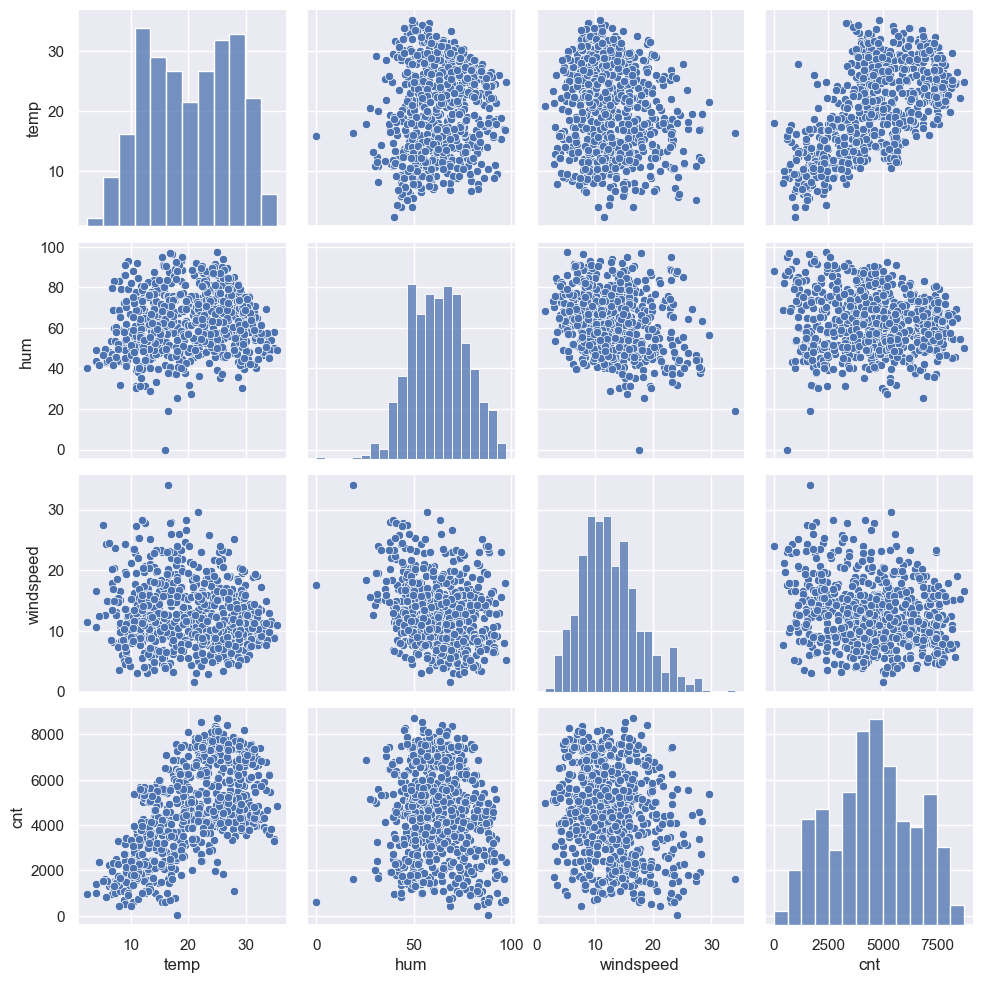

In [30]:
sns.pairplot(ds_updated)
plt.show()

### Step - 2. Data Preparation

#### 2.1 Dummies creation

In [31]:
predictors = ['season', 'mnth', 'weekday', 'weathersit']

In [32]:
status=pd.get_dummies(ds_updated[['season','weekday','mnth','weathersit']],drop_first=True)

In [33]:
ds_updated = pd.concat([ds_updated,status], axis = 1)

In [34]:
ds_updated=ds_updated.drop(predictors,axis=1)

In [35]:
ds_updated.describe()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist,weathersit_LightSnow
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849,0.252055,0.257534,0.243836,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.076712,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.336986,0.028767
std,7.506729,14.237589,5.195841,1936.011647,0.434490,0.437576,0.429689,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.266317,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971,0.473004,0.167266
min,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.880615,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
ds_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   yr                    730 non-null    category
 1   holiday               730 non-null    category
 2   workingday            730 non-null    category
 3   temp                  730 non-null    float64 
 4   hum                   730 non-null    float64 
 5   windspeed             730 non-null    float64 
 6   cnt                   730 non-null    int64   
 7   season_summer         730 non-null    uint8   
 8   season_fall           730 non-null    uint8   
 9   season_winter         730 non-null    uint8   
 10  weekday_Mon           730 non-null    uint8   
 11  weekday_Tue           730 non-null    uint8   
 12  weekday_Wed           730 non-null    uint8   
 13  weekday_Thu           730 non-null    uint8   
 14  weekday_Fri           730 non-null    uint8   
 15  weekda

In [37]:
ds_updated[['yr','holiday','workingday']]= ds_updated[['yr','holiday','workingday']].astype('uint8')

### Step 3: Splitting the Data into Training and Testing Sets

In [38]:
df_train, df_test=train_test_split(ds_updated,test_size=0.2,random_state=42)

#### 3.1 Rescaling the Features

In [39]:
scaler = MinMaxScaler()
df_train[numeric] = scaler.fit_transform(df_train[numeric])

In [40]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist,weathersit_LightSnow
247,0,1,0,0.765327,0.814513,0.475900,0.382996,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
335,0,0,1,0.317788,0.644911,0.195963,0.450759,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
702,1,0,1,0.519232,0.756118,0.379454,0.757478,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
440,1,0,0,0.566998,0.778874,0.220845,0.898988,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
136,0,0,1,0.626185,0.863461,0.637592,0.471813,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0.405237,0.543468,0.620712,0.275541,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0.495350,0.494203,0.702966,0.428210,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
270,0,0,1,0.717562,0.874624,0.315685,0.446963,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
435,1,0,1,0.507811,0.504079,0.463438,0.606995,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist,weathersit_LightSnow
247,0,1,0,0.765327,0.814513,0.475900,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
335,0,0,1,0.317788,0.644911,0.195963,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
702,1,0,1,0.519232,0.756118,0.379454,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
440,1,0,0,0.566998,0.778874,0.220845,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
136,0,0,1,0.626185,0.863461,0.637592,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0.405237,0.543468,0.620712,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0.495350,0.494203,0.702966,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
270,0,0,1,0.717562,0.874624,0.315685,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
435,1,0,1,0.507811,0.504079,0.463438,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Step - 4. Data Modeling and Evaluation

#### 4.1 Training Model : iteration1

In [43]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                   0.188885
yr                      0.226816
holiday                -0.029435
workingday              0.038151
temp                    0.435374
hum                    -0.162270
windspeed              -0.133629
season_summer           0.127137
season_fall             0.115022
season_winter           0.202892
weekday_Mon            -0.012146
weekday_Tue            -0.004175
weekday_Wed             0.010595
weekday_Thu             0.002511
weekday_Fri             0.011930
weekday_Sat             0.052757
mnth_feb                0.013116
mnth_mar                0.060224
mnth_apr                0.020211
mnth_may                0.048173
mnth_jun                0.016706
mnth_jul               -0.028351
mnth_aug                0.006505
mnth_sep                0.082788
mnth_oct                0.036353
mnth_nov               -0.044301
mnth_dec               -0.030402
weathersit_Mist        -0.051116
weathersit_LightSnow   -0.244566
dtype: float64

In [44]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     110.9
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          4.62e-204
Time:                        22:56:46   Log-Likelihood:                 584.58
No. Observations:                 584   AIC:                            -1113.
Df Residuals:                     556   BIC:                            -990.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1889 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weekday_Thu,inf
10,weekday_Tue,inf
1,holiday,inf
13,weekday_Fri,inf
11,weekday_Wed,inf
9,weekday_Mon,inf
2,workingday,inf
3,temp,47.78
4,hum,21.33
7,season_fall,16.20


#### output <br>
Total we have 28 independent variables are consider <br>
R2 square is 0.843

#### 4.2  Model Selection and Stepwise Regression -iteration 2

In [47]:
y = y_train

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X_train[variables]), model)

best_model, best_variables = stepwise_selection(X_train.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: yr, holiday, workingday, temp, hum, windspeed, season_summer, season_fall, season_winter, weekday_Mon, weekday_Tue, weekday_Wed, weekday_Thu, weekday_Fri, weekday_Sat, mnth_feb, mnth_mar, mnth_apr, mnth_may, mnth_jun, mnth_jul, mnth_aug, mnth_sep, mnth_oct, mnth_nov, mnth_dec, weathersit_Mist, weathersit_LightSnow
Start: score=-82.32, constant
Step: score=-374.69, add temp
Step: score=-726.05, add yr
Step: score=-805.01, add season_winter
Step: score=-892.13, add weathersit_LightSnow
Step: score=-935.75, add weathersit_Mist
Step: score=-982.60, add season_summer
Step: score=-1017.46, add mnth_sep
Step: score=-1039.29, add windspeed
Step: score=-1060.02, add hum
Step: score=-1071.77, add holiday
Step: score=-1082.59, add mnth_oct
Step: score=-1097.80, add season_fall
Step: score=-1104.56, add mnth_mar
Step: score=-1107.46, add mnth_jul
Step: score=-1109.47, add mnth_may
Step: score=-1110.73, add weekday_Sat
Step: score=-1122.17, add workingday
Step: score=-1122.24, add weekda

In [48]:
best_variables

['temp',
 'yr',
 'season_winter',
 'weathersit_LightSnow',
 'weathersit_Mist',
 'season_summer',
 'mnth_sep',
 'windspeed',
 'hum',
 'mnth_oct',
 'season_fall',
 'mnth_mar',
 'mnth_jul',
 'mnth_may',
 'weekday_Sat',
 'workingday',
 'weekday_Mon']

In [49]:
X_train_lm_2 = sm.add_constant(X_train[best_variables])

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

lr_2.params

const                   0.185478
temp                    0.457826
yr                      0.226373
season_winter           0.163351
weathersit_LightSnow   -0.243759
weathersit_Mist        -0.050192
season_summer           0.136332
mnth_sep                0.088014
windspeed              -0.135016
hum                    -0.170011
mnth_oct                0.068639
season_fall             0.106817
mnth_mar                0.051691
mnth_jul               -0.034467
mnth_may                0.029029
weekday_Sat             0.056324
workingday              0.048190
weekday_Mon            -0.020940
dtype: float64

In [50]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          4.40e-213
Time:                        23:01:23   Log-Likelihood:                 580.29
No. Observations:                 584   AIC:                            -1125.
Df Residuals:                     566   BIC:                            -1046.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1855 

In [51]:
vif = pd.DataFrame()
X=X_train[best_variables]
vif['Features'] = best_variables
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,26.09
8,hum,17.37
10,season_fall,8.03
7,windspeed,4.66
15,workingday,4.48
5,season_summer,4.26
2,season_winter,3.29
4,weathersit_Mist,2.11
1,yr,2.02
12,mnth_jul,1.84


#### output for iteration 2 <br>
we used stepwise Stepwise Regression <br>

#### 4.3 Regression Model -iteration 3

In [53]:
best_variables_2 = [i for i in best_variables if i != 'hum']

In [55]:
X_train_lm_3 = sm.add_constant(X_train[best_variables_2])

lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

lr_3.params

const                   0.083460
temp                    0.433171
yr                      0.231524
season_winter           0.159064
weathersit_LightSnow   -0.295742
weathersit_Mist        -0.078061
season_summer           0.141818
mnth_sep                0.079266
windspeed              -0.107058
mnth_oct                0.066994
season_fall             0.111464
mnth_mar                0.054441
mnth_jul               -0.028435
mnth_may                0.019064
weekday_Sat             0.057888
workingday              0.050076
weekday_Mon            -0.023409
dtype: float64

In [56]:
print(lr_3.summary())
vif = pd.DataFrame()
X=X_train[best_variables_2]
vif['Features'] = best_variables_2
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          1.80e-209
Time:                        23:06:03   Log-Likelihood:                 568.96
No. Observations:                 584   AIC:                            -1104.
Df Residuals:                     567   BIC:                            -1030.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0835 

,Features,VIF
0,temp,19.01
9,season_fall,7.75
7,windspeed,4.22
14,workingday,4.17
5,season_summer,4.15
2,season_winter,3.19
1,yr,2.02
11,mnth_jul,1.82
8,mnth_oct,1.72
12,mnth_may,1.66


#### 4.4 Regression Model-iteration 4

In [57]:
best_variables_4 = [i for i in best_variables_2 if i != 'season_fall']
X_train_lm_4 = sm.add_constant(X_train[best_variables_4])

lr_4 = sm.OLS(y_train, X_train_lm_4).fit()

lr_4.params

const                   0.063120
temp                    0.564503
yr                      0.229514
season_winter           0.121206
weathersit_LightSnow   -0.290956
weathersit_Mist        -0.077878
season_summer           0.087606
mnth_sep                0.100123
windspeed              -0.106330
mnth_oct                0.053378
mnth_mar                0.040782
mnth_jul               -0.010579
mnth_may                0.005500
weekday_Sat             0.060737
workingday              0.051430
weekday_Mon            -0.024320
dtype: float64

In [58]:
print(lr_4.summary())
vif = pd.DataFrame()
X=X_train[best_variables_4]
vif['Features'] = best_variables_4
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          9.27e-205
Time:                        23:06:56   Log-Likelihood:                 555.02
No. Observations:                 584   AIC:                            -1078.
Df Residuals:                     568   BIC:                            -1008.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0631 

,Features,VIF
0,temp,7.61
13,workingday,4.16
7,windspeed,4.14
5,season_summer,2.44
2,season_winter,2.12
1,yr,2.00
10,mnth_jul,1.74
8,mnth_oct,1.69
11,mnth_may,1.62
12,weekday_Sat,1.62


#### 4.5  Regression Model -iteration 5

In [59]:
best_variables_5 = [i for i in best_variables_4 if i != 'mnth_jul']
X_train_lm_5 = sm.add_constant(X_train[best_variables_5])

lr_5 = sm.OLS(y_train, X_train_lm_5).fit()

lr_5.params

const                   0.064266
temp                    0.557462
yr                      0.229570
season_winter           0.122178
weathersit_LightSnow   -0.291445
weathersit_Mist        -0.077706
season_summer           0.090002
mnth_sep                0.103285
windspeed              -0.105947
mnth_oct                0.054661
mnth_mar                0.041140
mnth_may                0.006164
weekday_Sat             0.060909
workingday              0.051707
weekday_Mon            -0.024349
dtype: float64

In [60]:
print(lr_5.summary())
vif = pd.DataFrame()
X=X_train[best_variables_5]
vif['Features'] = best_variables_5
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     193.8
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          7.91e-206
Time:                        23:07:39   Log-Likelihood:                 554.83
No. Observations:                 584   AIC:                            -1080.
Df Residuals:                     569   BIC:                            -1014.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0643 

,Features,VIF
0,temp,5.25
12,workingday,4.13
7,windspeed,4.09
5,season_summer,2.20
2,season_winter,2.06
1,yr,2.00
8,mnth_oct,1.67
10,mnth_may,1.62
11,weekday_Sat,1.62
4,weathersit_Mist,1.55


#### 4.6  Regression Model -iteration 6

In [61]:
best_variables_6 = [i for i in best_variables_5 if i != 'mnth_may']
X_train_lm_6= sm.add_constant(X_train[best_variables_6])

lr_6 = sm.OLS(y_train, X_train_lm_6).fit()

lr_6.params

const                   0.064294
temp                    0.557842
yr                      0.229571
season_winter           0.122135
weathersit_LightSnow   -0.291596
weathersit_Mist        -0.077592
season_summer           0.092189
mnth_sep                0.103103
windspeed              -0.106550
mnth_oct                0.054602
mnth_mar                0.040221
weekday_Sat             0.060935
workingday              0.051824
weekday_Mon            -0.024450
dtype: float64

In [62]:
print(lr_6.summary())
vif = pd.DataFrame()
X=X_train[best_variables_6]
vif['Features'] = best_variables_6
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          5.74e-207
Time:                        23:08:05   Log-Likelihood:                 554.76
No. Observations:                 584   AIC:                            -1082.
Df Residuals:                     570   BIC:                            -1020.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0643 

,Features,VIF
0,temp,5.22
11,workingday,4.13
7,windspeed,4.06
2,season_winter,2.06
1,yr,2.00
8,mnth_oct,1.67
5,season_summer,1.63
10,weekday_Sat,1.62
4,weathersit_Mist,1.55
6,mnth_sep,1.24


#### 4.7 Regression Model -iteration 7

In [64]:
best_variables_7 = [i for i in best_variables_6 if i != 'weekday_Mon']
X_train_lm_7= sm.add_constant(X_train[best_variables_7])

lr_7 = sm.OLS(y_train, X_train_lm_7).fit()

lr_7.params

const                   0.061547
temp                    0.558440
yr                      0.229244
season_winter           0.121961
weathersit_LightSnow   -0.289359
weathersit_Mist        -0.078042
season_summer           0.092285
mnth_sep                0.103462
windspeed              -0.107342
mnth_oct                0.054390
mnth_mar                0.042488
weekday_Sat             0.063847
workingday              0.050093
dtype: float64

In [65]:
print(lr_7.summary())
vif = pd.DataFrame()
X=X_train[best_variables_7]
vif['Features'] = best_variables_7
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.82e-207
Time:                        23:08:28   Log-Likelihood:                 552.37
No. Observations:                 584   AIC:                            -1079.
Df Residuals:                     571   BIC:                            -1022.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0615 

,Features,VIF
0,temp,5.22
11,workingday,4.08
7,windspeed,4.03
2,season_winter,2.05
1,yr,2.00
8,mnth_oct,1.67
5,season_summer,1.63
10,weekday_Sat,1.61
4,weathersit_Mist,1.55
6,mnth_sep,1.24


#### 4.8 Regression Model- Final model

In [66]:
best_variables_8 = [i for i in best_variables_7 if i != 'mnth_mar']
X_train_lm_8= sm.add_constant(X_train[best_variables_8])

lr_8 = sm.OLS(y_train, X_train_lm_8).fit()

lr_8.params

const                   0.069935
temp                    0.548628
yr                      0.229725
season_winter           0.116895
weathersit_LightSnow   -0.286715
weathersit_Mist        -0.076990
season_summer           0.093443
mnth_sep                0.102156
windspeed              -0.109262
mnth_oct                0.055327
weekday_Sat             0.063190
workingday              0.051579
dtype: float64

In [67]:
print(lr_8.summary())
vif = pd.DataFrame()
X=X_train[best_variables_8]
vif['Features'] = best_variables_8
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     242.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          6.11e-207
Time:                        23:10:53   Log-Likelihood:                 549.04
No. Observations:                 584   AIC:                            -1074.
Df Residuals:                     572   BIC:                            -1022.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0699 

,Features,VIF
0,temp,5.15
7,windspeed,4.00
10,workingday,4.00
2,season_winter,2.03
1,yr,1.99
8,mnth_oct,1.67
5,season_summer,1.63
9,weekday_Sat,1.61
4,weathersit_Mist,1.54
6,mnth_sep,1.24


#### 4.9 Model Evaluation on train set

In [68]:
#Residual analysis
ypredict=lr_8.predict(X_train_lm_8)

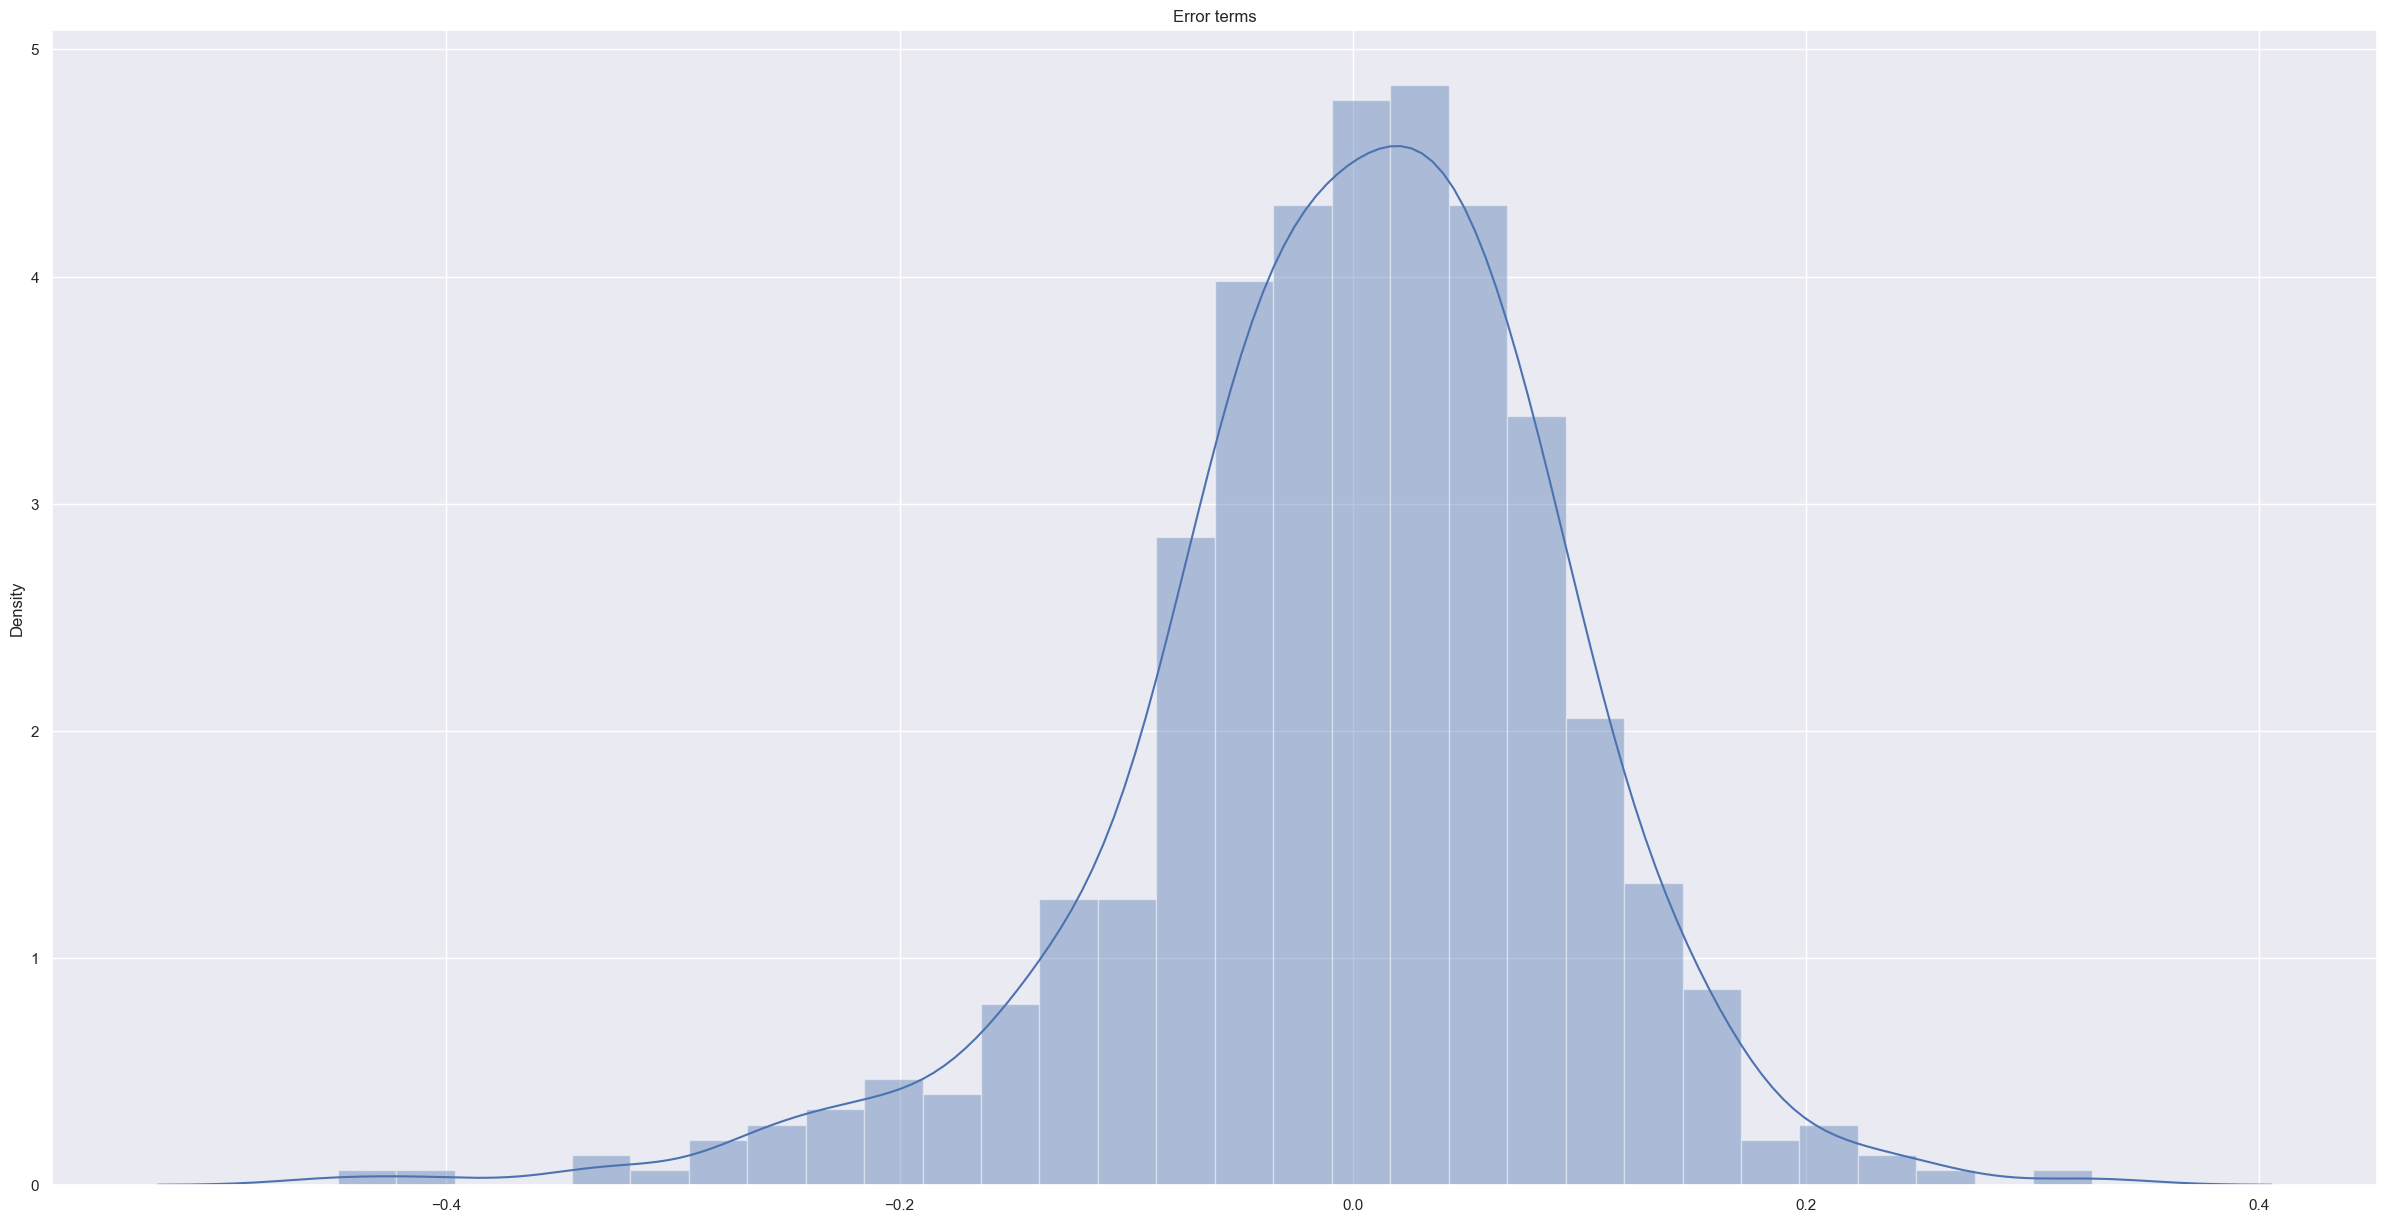

In [69]:
res = y_train - ypredict
sns.distplot(res)
plt.title('Error terms')
plt.show()

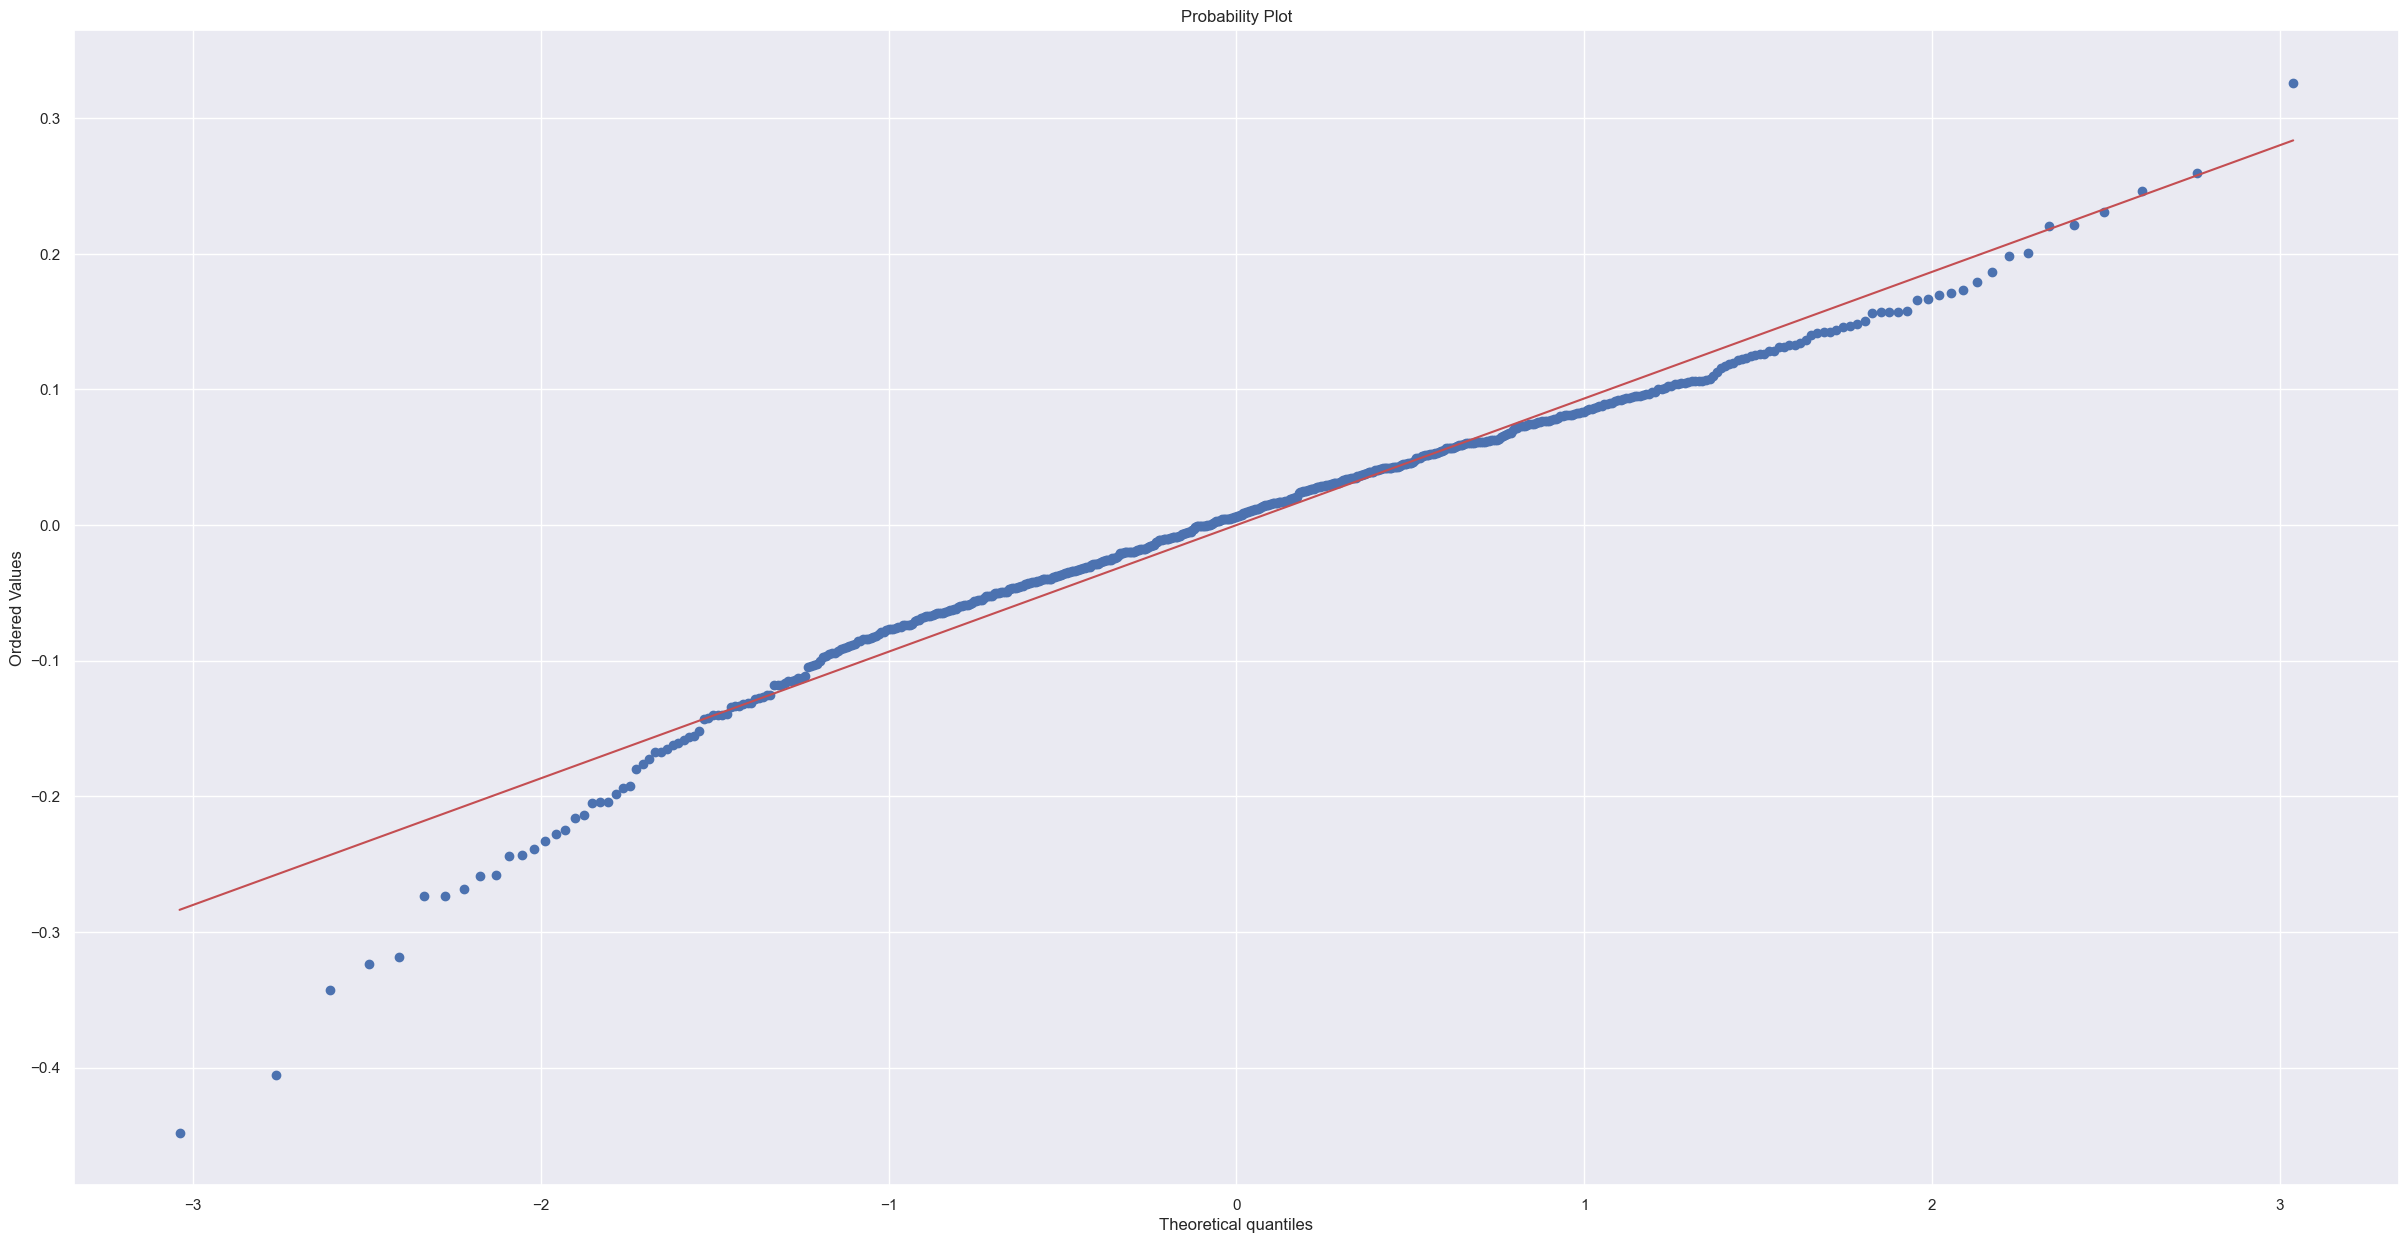

In [70]:
# QQ plot
x = stats.probplot(res,plot=plt)

#### 4.10 Prediction on test set

In [71]:
df_test[numeric] = scaler.transform(df_test[numeric])

In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
X_test_sm = sm.add_constant(X_test[best_variables_8])
X_test_sm.head()

,const,temp,yr,season_winter,weathersit_LightSnow,weathersit_Mist,season_summer,mnth_sep,windspeed,mnth_oct,weekday_Sat,workingday
468,1.0,0.543115,1,0,0,0,1,0,0.421436,0,1,0
148,1.0,0.758058,0,0,0,0,1,0,0.479005,0,0,0
302,1.0,0.324018,0,1,0,0,0,0,0.385676,1,0,0
355,1.0,0.453814,0,0,0,1,0,0,0.062226,0,0,1
515,1.0,0.773634,1,0,0,0,1,0,0.432344,0,0,1


In [74]:
y_test_pred = lr_8.predict(X_test_sm)

In [75]:
#### 4.11 Evaluate the model on test set

r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.841


In [76]:
N= len(X_test)          # sample size
p =len(best_variables_8)    # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.827


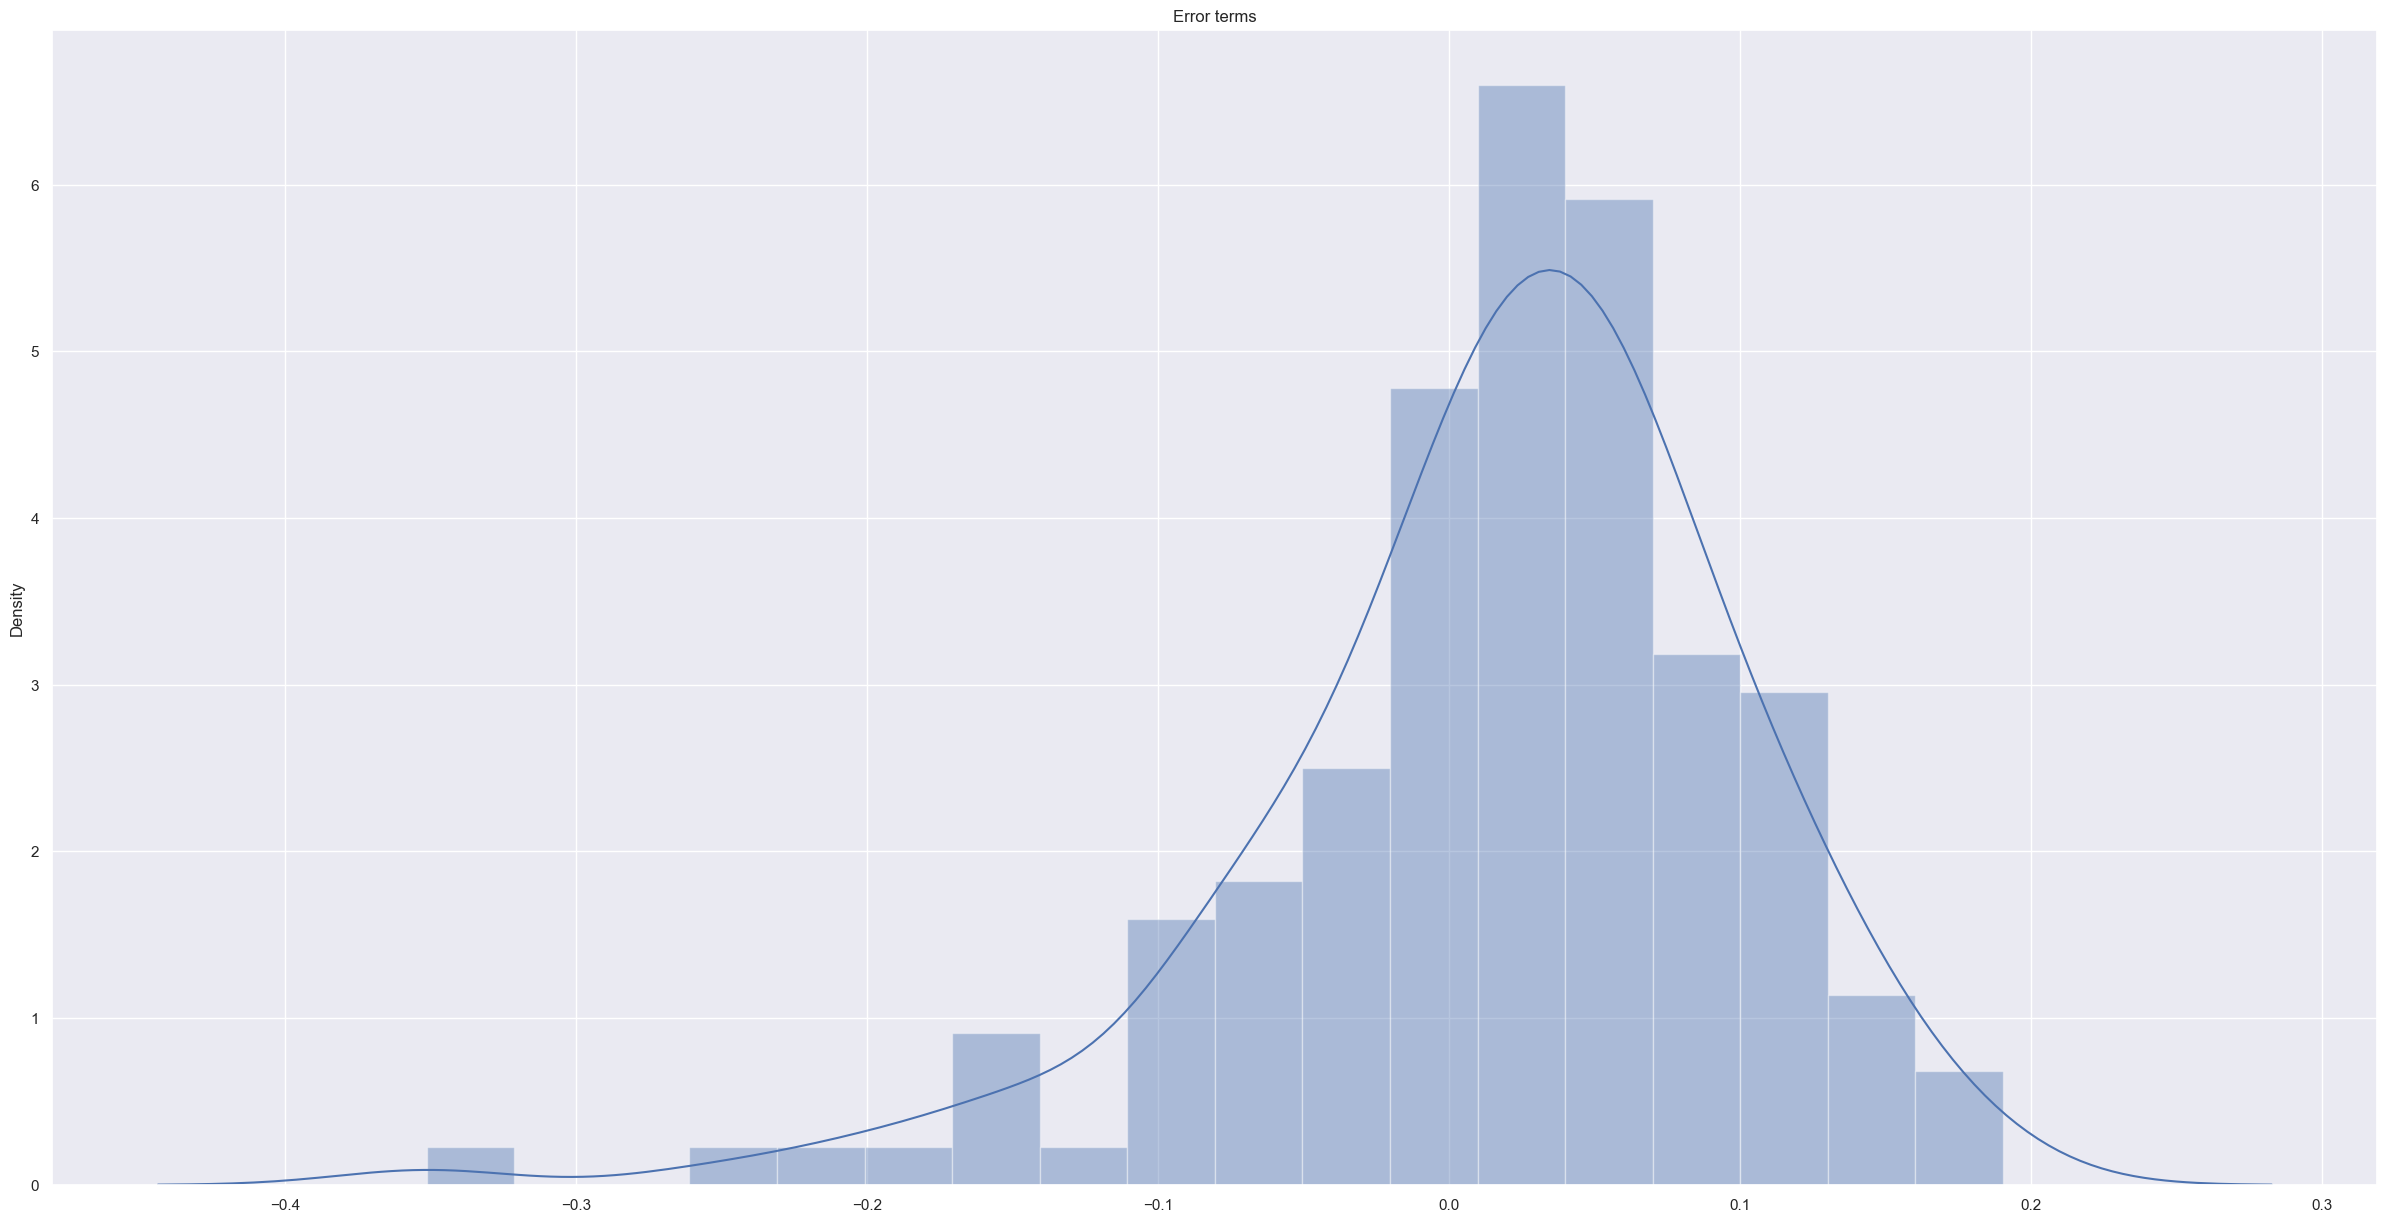

In [77]:
res = y_test - y_test_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

In [78]:
res.std()

0.08337991990295604

Text(0, 0.5, 'y_test_pred')

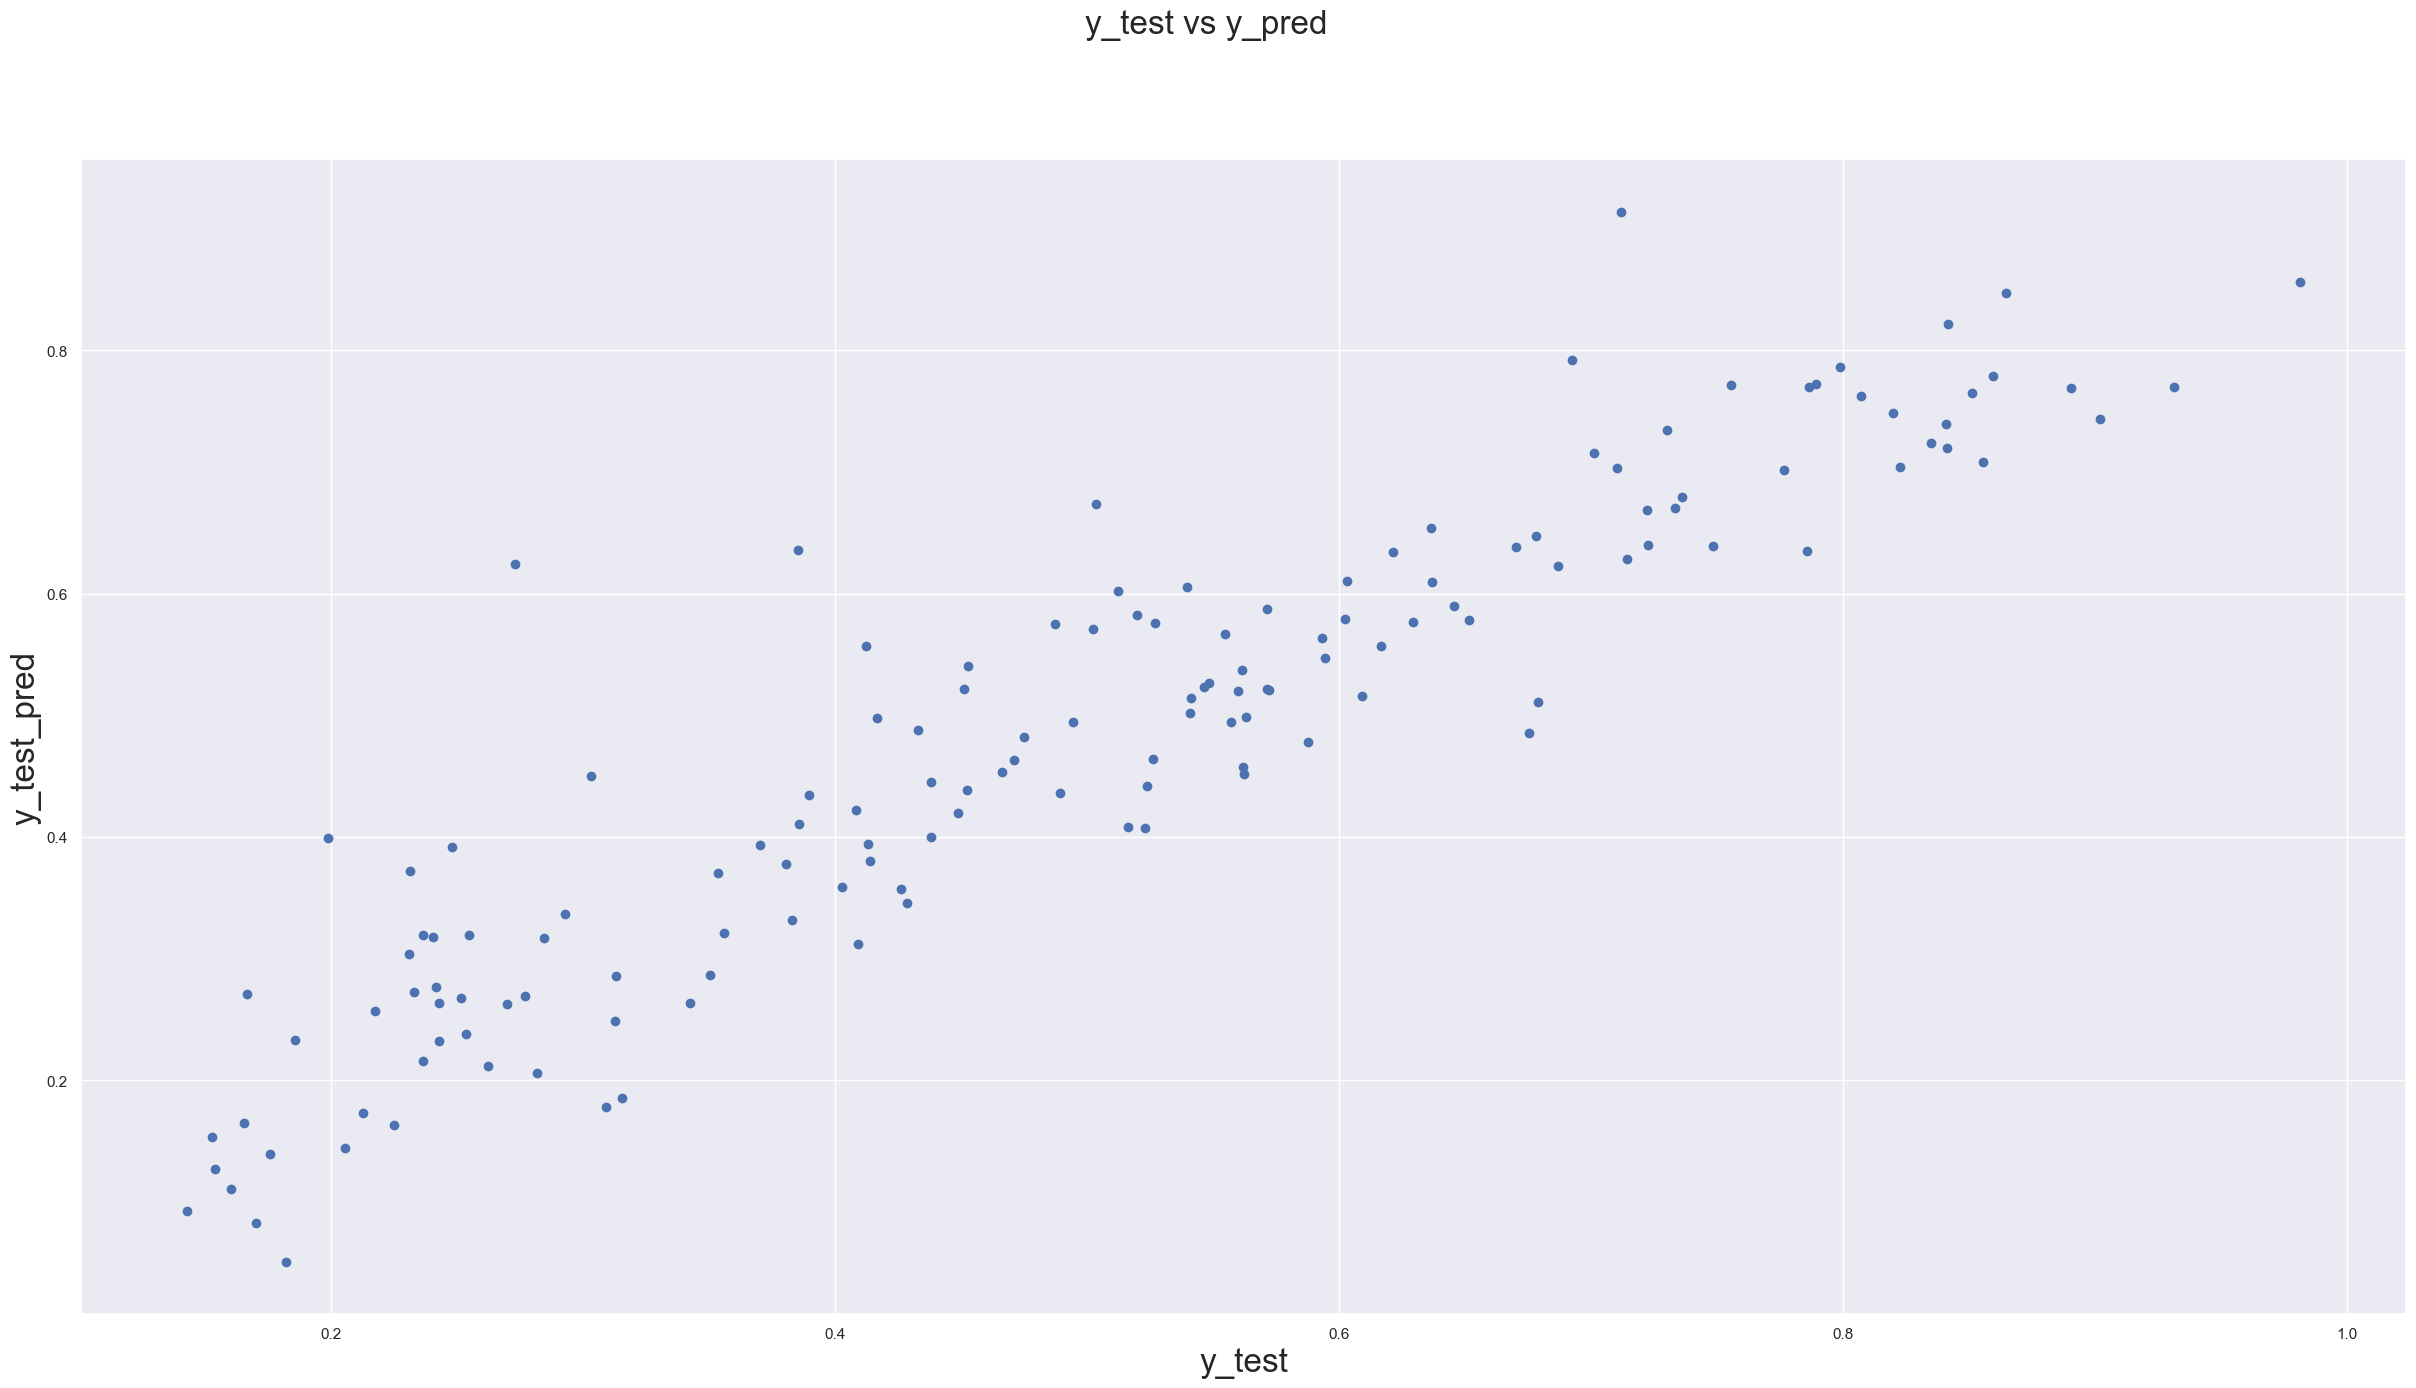

In [79]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 24)              # Plot heading 
plt.xlabel('y_test', fontsize = 24)                          # X-label
plt.ylabel('y_test_pred', fontsize = 24)  

In [80]:
print(round(lr_8.params,3))

const                   0.070
temp                    0.549
yr                      0.230
season_winter           0.117
weathersit_LightSnow   -0.287
weathersit_Mist        -0.077
season_summer           0.093
mnth_sep                0.102
windspeed              -0.109
mnth_oct                0.055
weekday_Sat             0.063
workingday              0.052
dtype: float64


In [81]:
print('R- Sqaured train: ', round(lr_8.rsquared,2), '  Adj. R-Squared train:', round(lr_8.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))


R- Sqaured train:  0.82   Adj. R-Squared train: 0.82
R- Sqaured test :  0.84   Adj. R-Squared test : 0.827
